In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
todoFullStates=['New York','New Jersey','Florida','Michigan','Texas','Oklahoma','Washington','Louisiana','California']
todoStates=['New York','Texas','Illinois','Illinois','Texas','Texas']
todoCounties = ['Broome','Hidalgo','Cook','Lake','Bexar','Harris']

In [3]:
dsState = pd.read_csv(r"C:\Users\LEN320\Google Drive\DEV\Python\covid-19-data-master\us-states.csv")
ds = pd.read_csv(r"C:\Users\LEN320\Google Drive\DEV\Python\covid-19-data-master\us-counties.csv")
print(ds.head())
ds.describe()

         date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0


,fips,cases,deaths
count,207353.000000,209599.000000,209599.000000
mean,30061.749437,360.019924,20.228594
std,15353.818846,3497.282858,316.363143
min,1001.000000,0.000000,0.000000
25%,18077.000000,4.000000,0.000000
50%,29053.000000,19.000000,0.000000
75%,45039.000000,90.000000,3.000000
max,56045.000000,210728.000000,21262.000000


In [4]:
def doplot(ds, title):
    #pd.set_option('display.mpl_style', 'default') 
    pd.set_option('display.width', 10000) 
    #pd.set_option('display.max_columns', 60) 
    #plt.scatter(x_data['views'], y_data,  color='black')
    plt.yscale('log')
    #plt.xscale('log')
    #plt.scatter(x_data['views'], y_data,  color='red')
    #plt.plot(x_data['views'], y_pred, color='black')
    #plt.show()
    plt.xlabel(title)
    plt.ylabel('#')
    #plt.scatter(x1,y1, color='red')
    plt.plot(ds['cases'], color='black')
    plt.plot(ds['deaths'], color='red')
    
    plt.show()

In [5]:
ds.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [6]:
intx = ds['state']=='New York'
incty = ds['county'] == 'Tioga'
tx = ds[intx & incty]
tx.describe()
print(tx.head())

            date county     state     fips  cases  deaths
2169  2020-03-14  Tioga  New York  36107.0      1       0
2581  2020-03-15  Tioga  New York  36107.0      1       0
3042  2020-03-16  Tioga  New York  36107.0      1       0
3560  2020-03-17  Tioga  New York  36107.0      1       0
4161  2020-03-18  Tioga  New York  36107.0      1       0


In [7]:
tx = ds[intx]
tx.reset_index(inplace=True)
tx['date2'] = tx['date'].astype('datetime64[ns]')
tx.set_index('date2', inplace=True)
tx.sort_index(inplace=True)

C:\ANA\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\ANA\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


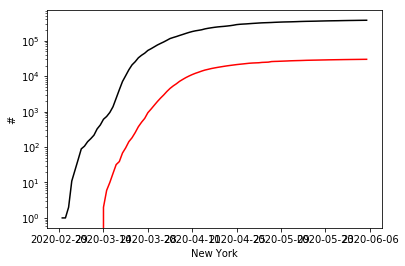

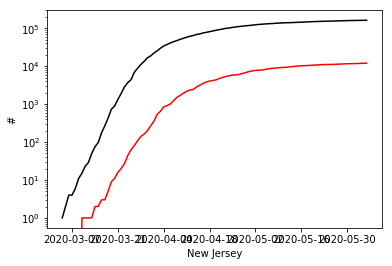

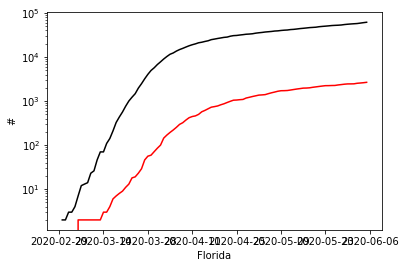

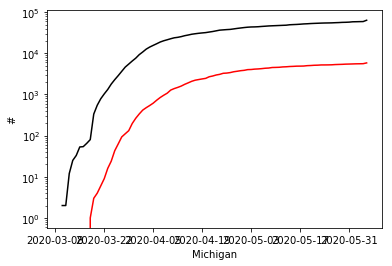

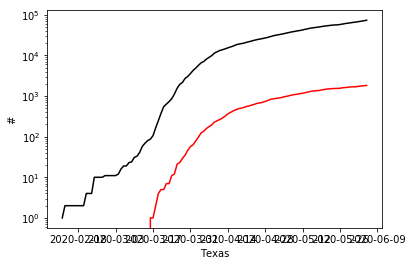

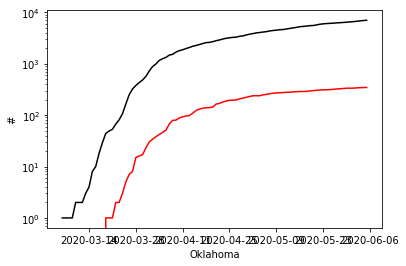

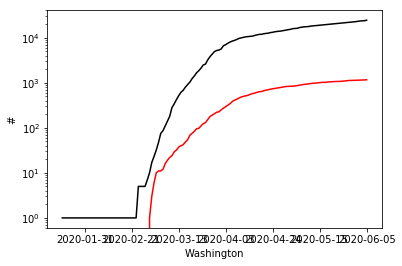

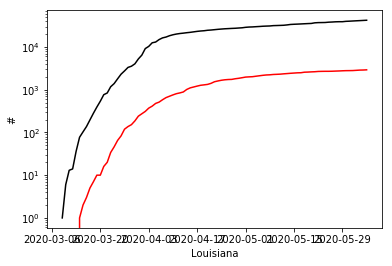

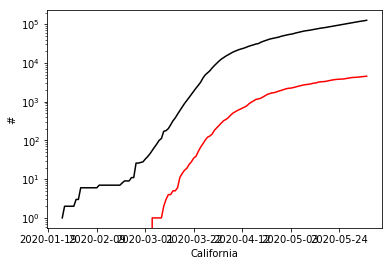

In [8]:
#plt.plot(tx['cases'])
for state in todoFullStates:
    intx = dsState['state']==state
    tx = dsState[intx]
    tx.reset_index(inplace=True)
    tx['date2'] = tx['date'].astype('datetime64[ns]')
    tx.set_index('date2', inplace=True)
    tx.sort_index(inplace=True)
    doplot(tx,state)

C:\ANA\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


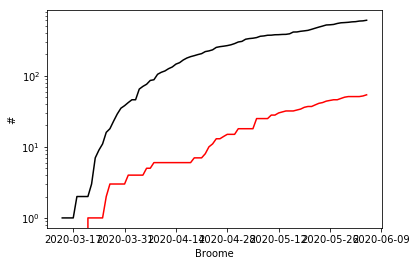

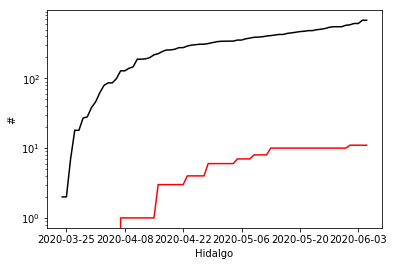

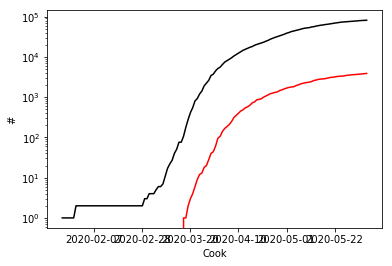

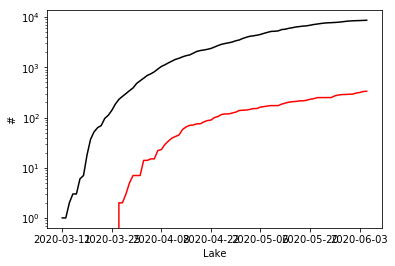

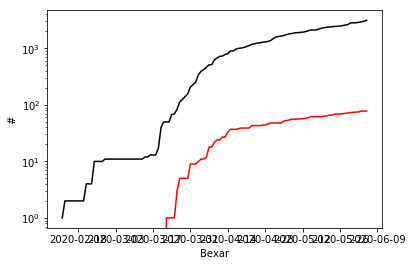

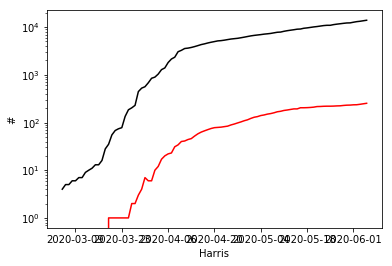

In [9]:
for istate,state in enumerate(todoStates):
    intx = ds['state']==state
    incty = ds['county'] == todoCounties[istate]
    tx = ds[intx & incty] 
    tx.reset_index(inplace=True)
    tx['date2'] = tx['date'].astype('datetime64[ns]')
    tx.set_index('date2', inplace=True)
    tx.sort_index(inplace=True)
    doplot(tx,todoCounties[istate])